In [66]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [67]:
!pip install pmdarima

In [76]:
monthly_data = pd.read_excel('Forecasting Assignment Data.xlsx',index_col=[1],parse_dates=True)

In [77]:
monthly_data=monthly_data.filter(['Maharashtra'], axis=1)

In [78]:
monthly_data.tail()

Maharashtra
Daily date             
2020-05-14        494.1
2020-05-15        492.8
2020-05-16        472.8
2020-05-17        475.3
2020-05-18        470.5

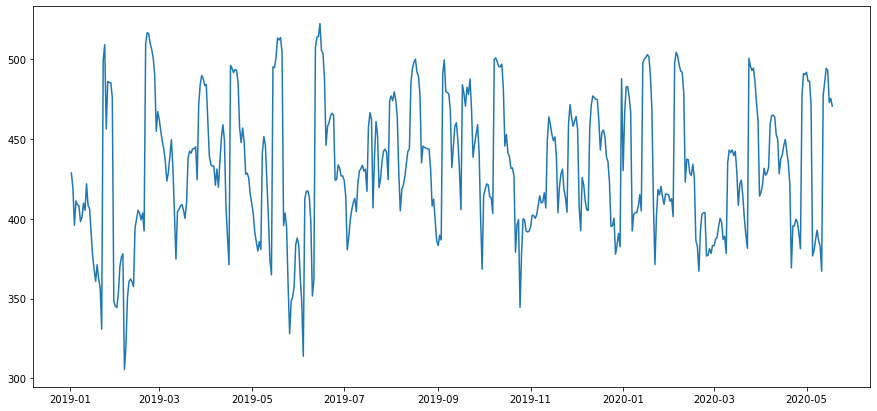

In [79]:
plt.figure(figsize=(15,7))
plt.plot(monthly_data)

In [80]:
day_new=np.arange(1,504)

In [81]:
q_ts = monthly_data

<AxesSubplot:xlabel='Daily date', ylabel='residual'>

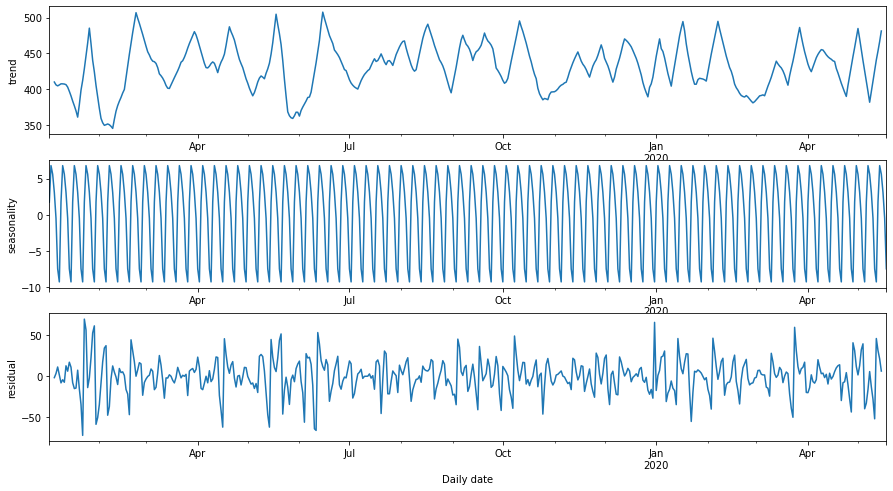

In [83]:
#Checking the trend and seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(q_ts, model='additive')
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
result.trend.plot(ax=ax1,ylabel = "trend")
result.seasonal.plot(ax=ax2,ylabel = "seasonality")
result.resid.plot(ax=ax3,ylabel = "residual")

In [84]:
#Checking the stationarity of the ts using Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
res = adfuller(q_ts.values.squeeze(),autolag = 'AIC')
dfoutput = pd.Series(res[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in res[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -6.567135e+00
p-value                        8.105968e-09
#Lags Used                     7.000000e+00
Number of Observations Used    4.950000e+02
Critical Value (1%)           -3.443630e+00
Critical Value (5%)           -2.867397e+00
Critical Value (10%)          -2.569889e+00
dtype: float64


In [85]:
len(q_ts)

503

In [86]:
train_qts=q_ts[:497]
test_qts=q_ts[497:]

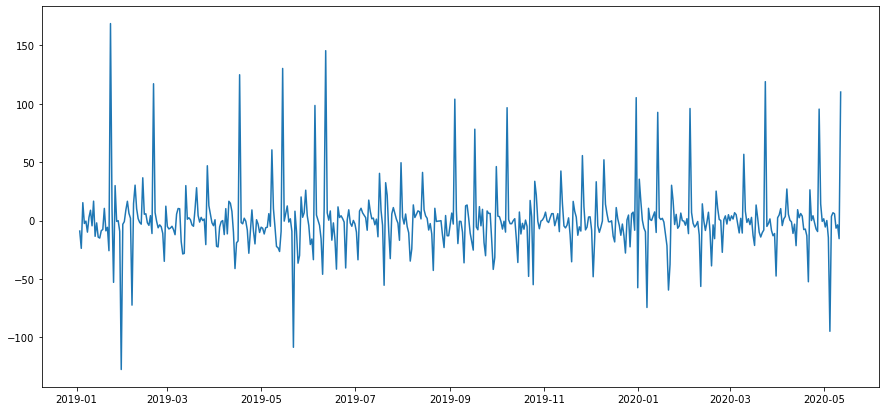

In [87]:
#Differenced version of our ts
lagged_qts = train_qts.diff()
plt.figure(figsize = (15,7))
plt.plot(lagged_qts)

In [88]:
import pmdarima
model = pmdarima.auto_arima(q_ts['Maharashtra'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      seasonal = True,
                      max_p = 5,
                      max_q = 5,
                      max_P = 5,
                      max_Q = 5,
                      start_P=0, 
                      D=1, 
                      start_Q = 0,
                      m = 4,
                      stepwise=True,
                      error_action = 'ignore',
                      suppress_warnings = True)
print(model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  503
Model:             SARIMAX(1, 0, 0)x(5, 1, [1], 4)   Log Likelihood               -2335.818
Date:                             Wed, 27 Jul 2022   AIC                           4687.636
Time:                                     14:51:57   BIC                           4721.336
Sample:                                          0   HQIC                          4700.861
                                             - 503                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8007      0.036     22.535      0.000       0.731       0.870
ar.S.L4       -0.0768      

In [89]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train_qts,order=(1,0,0),seasonal_order=(5,1,[1],4))
model_fit = model.fit()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [90]:
predictions = model_fit.forecast(90)
predictions

2020-05-13    473.043751
2020-05-14    463.701473
2020-05-15    458.499200
2020-05-16    446.351035
2020-05-17    444.271285
                 ...    
2020-08-06    432.685358
2020-08-07    432.822758
2020-08-08    432.455658
2020-08-09    429.925156
2020-08-10    432.685320
Freq: D, Name: predicted_mean, Length: 90, dtype: float64

In [102]:
next_90_predictions = np.array(predictions)

In [103]:
next_90_predictions

array([473.0437511 , 463.70147273, 458.49920045, 446.35103546,
       444.27128503, 439.33197123, 437.55223129, 429.51877548,
       431.61677011, 435.48323889, 435.38634746, 432.57917828,
       436.30240544, 439.85331931, 440.51740168, 433.26723529,
       430.11523855, 434.10561021, 435.65938929, 428.69322815,
       425.61486567, 429.52654524, 429.99699116, 432.0119911 ,
       428.97664047, 432.01026393, 432.14212978, 433.00183321,
       429.79804849, 432.27025647, 432.30962833, 432.54183133,
       429.68521651, 432.26355041, 432.26062156, 432.62655694,
       430.26405799, 432.87857826, 432.90412083, 432.73269472,
       430.30858616, 432.99713238, 433.13035237, 432.42015934,
       429.96315316, 432.74274706, 432.8990982 , 432.38865734,
       429.911278  , 432.71272541, 432.86878116, 432.43701924,
       429.9073007 , 432.6881276 , 432.84024828, 432.43286421,
       429.87691359, 432.64710887, 432.78956998, 432.443525  ,
       429.90057761, 432.66074789, 432.79468867, 432.46

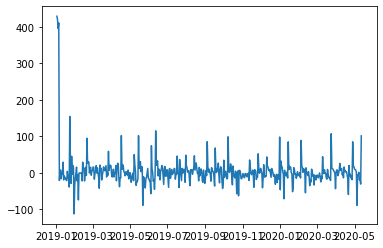

In [91]:
plt.plot(model_fit.resid)

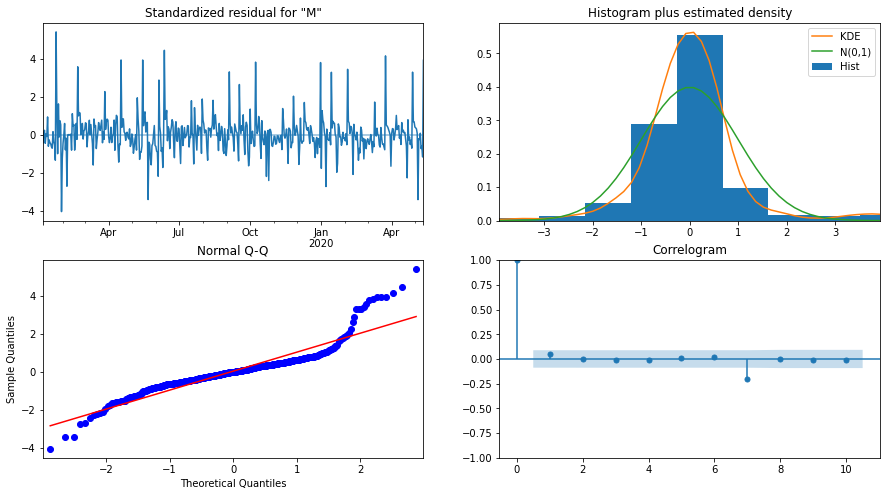

In [92]:
fig = model_fit.plot_diagnostics(figsize = (15,8))
plt.show()

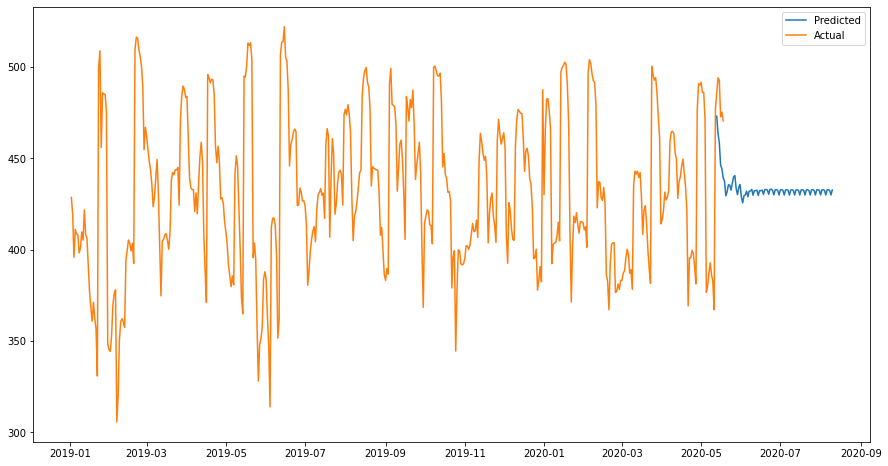

In [93]:
plt.figure(figsize = (15,8))
plt.plot(predictions, label = "Predicted")
plt.plot(q_ts,label = 'Actual')
plt.legend(loc = 'best')

In [94]:
sarimax = model_fit.fittedvalues

In [98]:
sarimax=np.array(sarimax)

In [99]:
q_ts_array=np.array(q_ts)

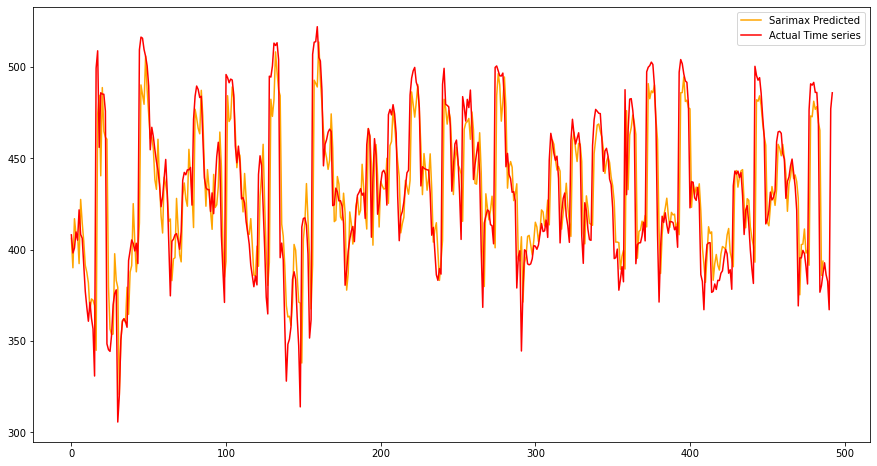

In [100]:
#Plotting and comparing the results
plt.figure(figsize = (15,8))
plt.plot(sarimax[5:-5], label = "Sarimax Predicted",color = 'orange')
plt.plot(q_ts_array[5:-5],label = 'Actual Time series',color = 'Red')
plt.legend(loc = 'best')